In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5
from triple_agent.classes.scl_set import sort_games_into_sets
from triple_agent.reports.specific.scl_set_scores import scl_set_scores_categorize
import matplotlib.pyplot as plt

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

In [5]:
scl5_sets = sort_games_into_sets(scl5_replays)

In [6]:
scores = [(6,6),(7,5),(7,4),(7,3),(7,2),(7,1),(7,0)]
compliant_scl5_sets = list(filter(lambda s: tuple(sorted(s.score, reverse=True)) in scores and s.division != 'Challenger', scl5_sets))

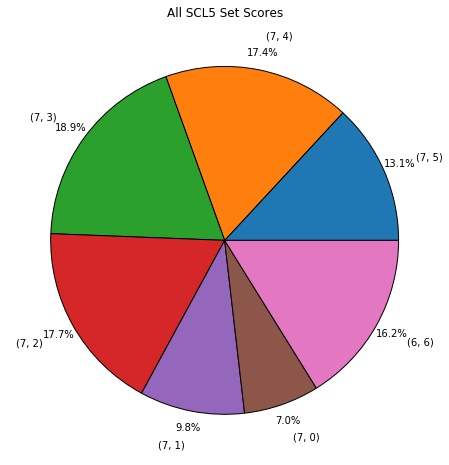

In [7]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    axis_properties=AxisProperties(title='All SCL5 Set Scores')
)

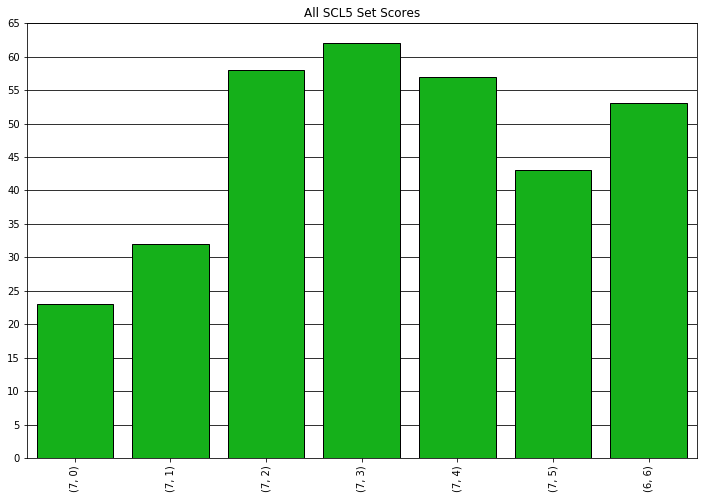

In [19]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    data_query=DataQueryProperties(stack_order=lambda name_series: (name_series[0][1], name_series[0][0])),
    axis_properties=AxisProperties(title='All SCL5 Set Scores', force_bar=True)
)

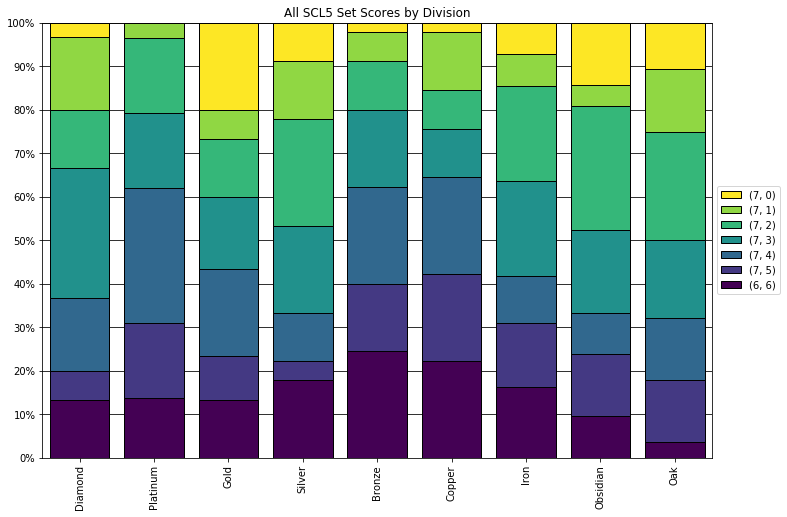

In [24]:
cmap = plt.get_cmap('viridis', len(scores))

color_dict = {score:cmap(i) for i,score in enumerate(scores)}

scl_set_scores_categorize(
    compliant_scl5_sets,
    data_query=DataQueryProperties(
        groupby=lambda s: s.division,
        stack_order = scores,
        reverse_stack_order=True,
        category_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(
        title='All SCL5 Set Scores by Division',
        data_color_dict = color_dict,
    )
)